In [3]:
#Import Libraries
import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [27]:
from sqlalchemy import create_engine

In [7]:
server = 'Server_name'
database = 'Database_name'
conn_str = f'mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server'

In [8]:
engine = create_engine(conn_str)


In [9]:
query = "SELECT * FROM jobms_consolidated_search_ds$"
df = pd.read_sql(query, engine)
print(df.head())

            Area Career Level                             Company  \
0  Not Specified        Entry                       EC Healthcare   
1  Not Specified       Senior                    A4lution Limited   
2  Not Specified        Entry                              now TV   
3  Not Specified        Entry    Deloitte Global Services Limited   
4  Not Specified        Entry  Lloyd Karson International Limited   

           Company Website Data Source Date Posted Date Scraped  \
0            Not Specified      JobsDB  10-22-2021   2021-10-22   
1            Not Specified      JobsDB  10-22-2021   2021-10-22   
2      http://www.pccw.com      JobsDB  10-22-2021   2021-10-22   
3  http://www.deloitte.com      JobsDB  10-21-2021   2021-10-22   
4            Not Specified      JobsDB  10-22-2021   2021-10-22   

  Employer Contact Number Employer Email  \
0                    None           None   
1           ['3955 8549']           None   
2           ['2827 8322']           None   
3     

In [10]:
df

,Area,Career Level,Company,Company Website,Data Source,Date Posted,Date Scraped,Employer Contact Number,Employer Email,Industry,...,Jobtick Dashboard,Jobtick Engineerjobs,jobtick Excel,jobtick Python,Jobtick Scientistjobs,jobtick SQL,Lower Salary Range,New Year Exp#,Upper Salary Range,Years of Experience
0,Not Specified,Entry,EC Healthcare,Not Specified,JobsDB,10-22-2021,2021-10-22,None,None,Health & Beauty Care,...,1.0,None,1.0,1.0,NaN,1.0,NaN,1.0,NaN,-1.0
1,Not Specified,Senior,A4lution Limited,Not Specified,JobsDB,10-22-2021,2021-10-22,['3955 8549'],None,Others,...,1.0,None,1.0,1.0,NaN,1.0,NaN,3.0,NaN,31.0
2,Not Specified,Entry,now TV,http://www.pccw.com,JobsDB,10-22-2021,2021-10-22,['2827 8322'],None,Telecommunication,...,NaN,None,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0
3,Not Specified,Entry,Deloitte Global Services Limited,http://www.deloitte.com,JobsDB,10-21-2021,2021-10-22,None,None,Accounting/Audit/Tax Services,...,1.0,None,NaN,1.0,1.0,1.0,NaN,2.0,NaN,2.0
4,Not Specified,Entry,Lloyd Karson International Limited,Not Specified,JobsDB,10-22-2021,2021-10-22,None,None,Human Resources Management/Consultancy,...,1.0,None,NaN,1.0,NaN,1.0,17.0,1.0,25.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,-,Senior,Manulife (International) Limited,Not Specified,CTGoodJobs,09-28-2021,2021-10-22,None,None,Not Specified,...,NaN,1,NaN,NaN,NaN,NaN,NaN,7.5,NaN,7.5
3207,Admiralty,Entry,PCCW Solutions Limited,Not Specified,CTGoodJobs,09-28-2021,2021-10-22,None,None,Not Specified,...,NaN,None,NaN,NaN,NaN,NaN,NaN,1.5,NaN,1.5
3208,Tai Kok Tsui,Middle,PCCW Solutions Limited,Not Specified,CTGoodJobs,09-28-2021,2021-10-22,None,None,Not Specified,...,NaN,None,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0
3209,Wong Tai Sin,Senior,Top Form International Limited,Not Specified,CTGoodJobs,09-28-2021,2021-10-22,None,None,Not Specified,...,NaN,None,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0


# Total number of jobs in Data Science field: 3211

In [11]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: total: 0 ns
Wall time: 0 ns


In [12]:
%%time
     
# function for getting details of the dataframe
def details(df):
    print(start+'Shape of the Dataframe:'+end,df.shape,'\n')
    print(start+'Summary Of the dataframe:'+end,'\n')
    print(df.info(),'\n')
    print(start+'Statistical Summary of the Dataframe:'+end,'\n',df.describe(),'\n')
    print(start+'Checking for Null values in the dataframe:'+end,'\n',df.isnull().sum(),'\n')
    print(start+'Columns in dataframe:'+end,df.columns)
    
    
#function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')
        
        
        
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains dublicate Values")
        
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }
#function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in data.columns:
        if len(data[i].value_counts())>20:
            df = data[i].value_counts()[:20]
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)
            
        else:
            df = data[i].value_counts()
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)

#function for plotting countplot of each with repect to any specific column for column havind unique value less than 20
def plot_columns(data,hue_name):

    for i in data.columns:
    
        if len(data[i].value_counts())<20:
            f, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(x=i, hue=hue_name, data=df)
            ax.set_title("Frequency distribution of "+i+" variable wrt "+hue_name)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.show()

            
# function for plotting box plot of each numerical column
def boxplot_variable(data):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot(x=i,  data=data)
        ax.set_title("Box Plot of "+i)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()

        
#function for plotting boxplot of each numerical column with respect to specific columns
def boxplot_mult(df,x,hue_name):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot( x=x,y=i,hue=hue_name, data=df)
        ax.set_title("Box Plot of "+i+" variable wrt "+x)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()
        

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
%%time
duplicate(df)

Dataframe doesn't contains dublicate Values
CPU times: total: 125 ms
Wall time: 206 ms


In [14]:
%%time
details(df)

Shape of the Dataframe: (3211, 32) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Area                     3211 non-null   object        
 1   Career Level             3211 non-null   object        
 2   Company                  3211 non-null   object        
 3   Company Website          3211 non-null   object        
 4   Data Source              3211 non-null   object        
 5   Date Posted              3211 non-null   object        
 6   Date Scraped             3211 non-null   datetime64[ns]
 7   Employer Contact Number  358 non-null    object        
 8   Employer Email           167 non-null    object        
 9   Industry                 3211 non-null   object        
 10  Job Description          3211 non-null   object        
 11  Job Functions            3211 

In [15]:
%%time
values_in_columns(df)

Column Name--->Area
Number of Unique Values 29 

Count of each unique value 
 Not Specified              3115
 -                           41
 Kowloon Bay                  7
 Lantau                       4
 Quarry Bay                   4
 Kwai Hing                    3
 Kwun Tong                    3
 Wanchai                      3
 Shatin                       3
 Pokfulam                     3
 Ngau Tau Kok                 2
 Hunghom                      2
 Sheung Wan                   2
 Wong Tai Sin                 2
 Tai Kok Tsui                 2
 North Point                  2
 Fotan                        1
 Kwai Fong                    1
 Central                      1
 Tin Hau                      1
 Cheung Sha Wan               1
 2 Locations                  1
 Hong Kong Science Park       1
 United Kingdom               1
 Wong Chuk Hang               1
 Mongkok                      1
 Causeway Bay                 1
 Tsimshatsui                  1
 Admiralty                

# Interpretations


<Axes: title={'center': 'Count of Job Title by career level'}, ylabel='Career Level'>

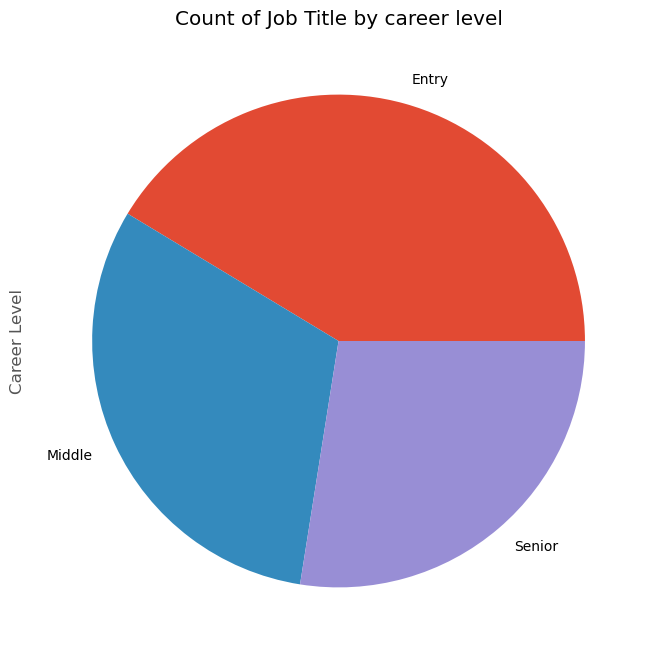

In [16]:
df['Career Level'].value_counts().plot(kind='pie',figsize=(8,8),title='Count of Job Title by career level')


<Axes: >

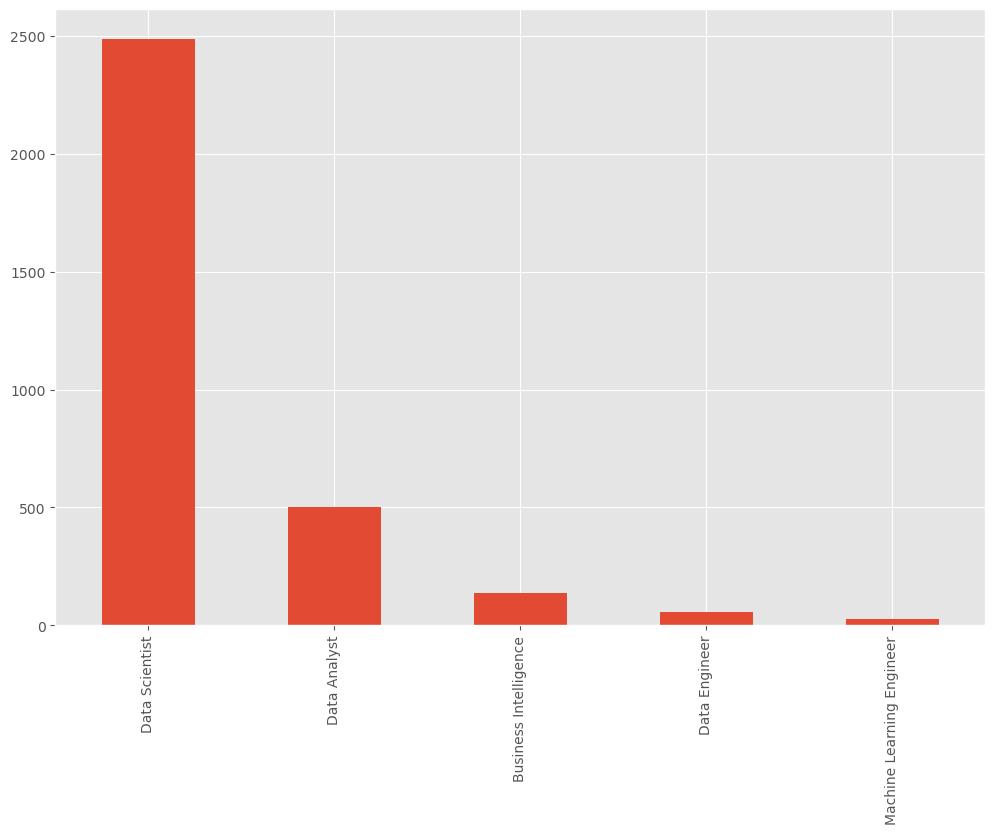

In [20]:
df['Search Term'].value_counts().plot(kind=bar)


<Axes: >

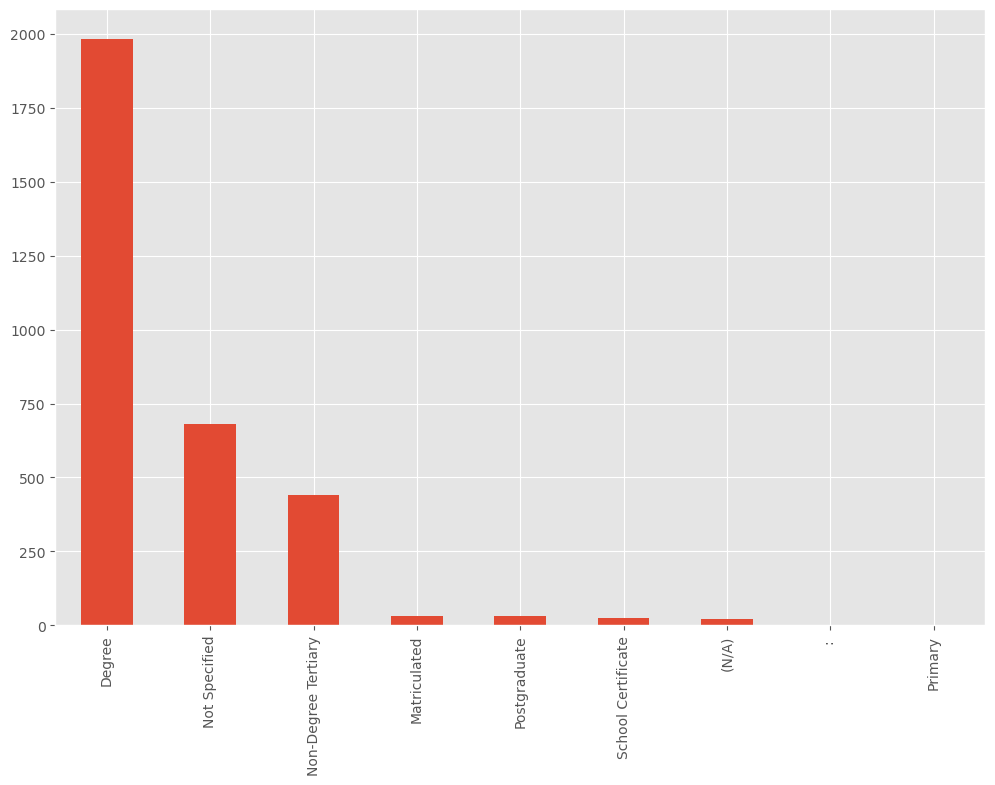

In [21]:
df['Qualification'].value_counts().plot.bar()


<Axes: ylabel='Job Type'>

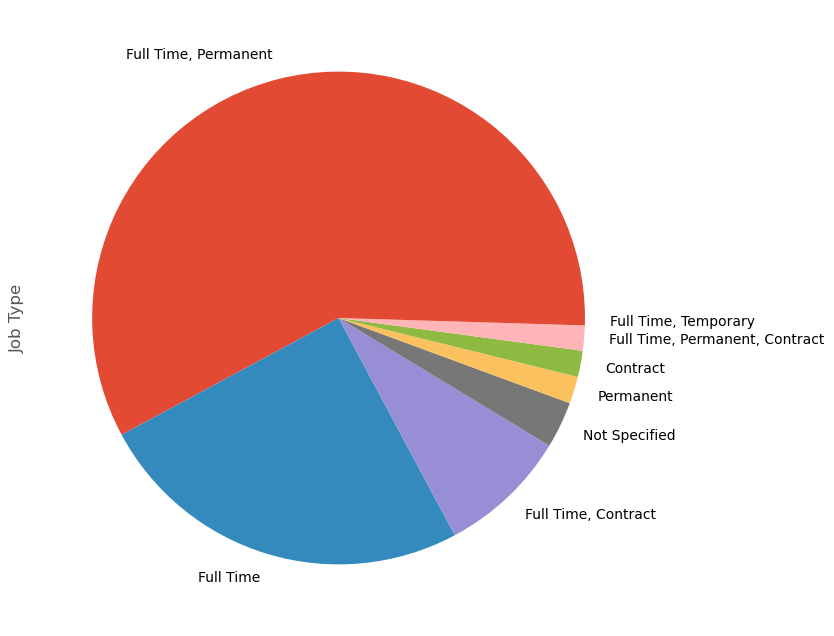

In [22]:
df['Job Type'].value_counts()[:8].plot(kind='pie',figsize=(8,8))


<Axes: >

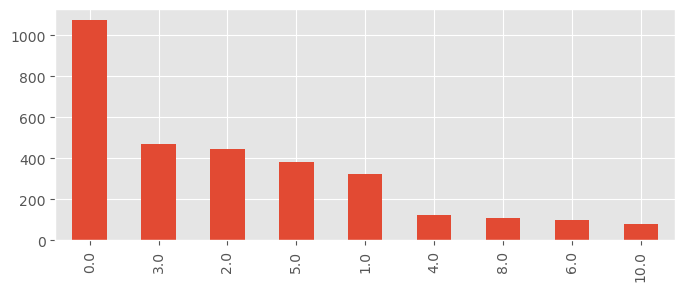

In [23]:
df['Years of Experience'].replace(-1,0).value_counts()[:10].plot.bar(figsize=(8,3))


<Axes: >

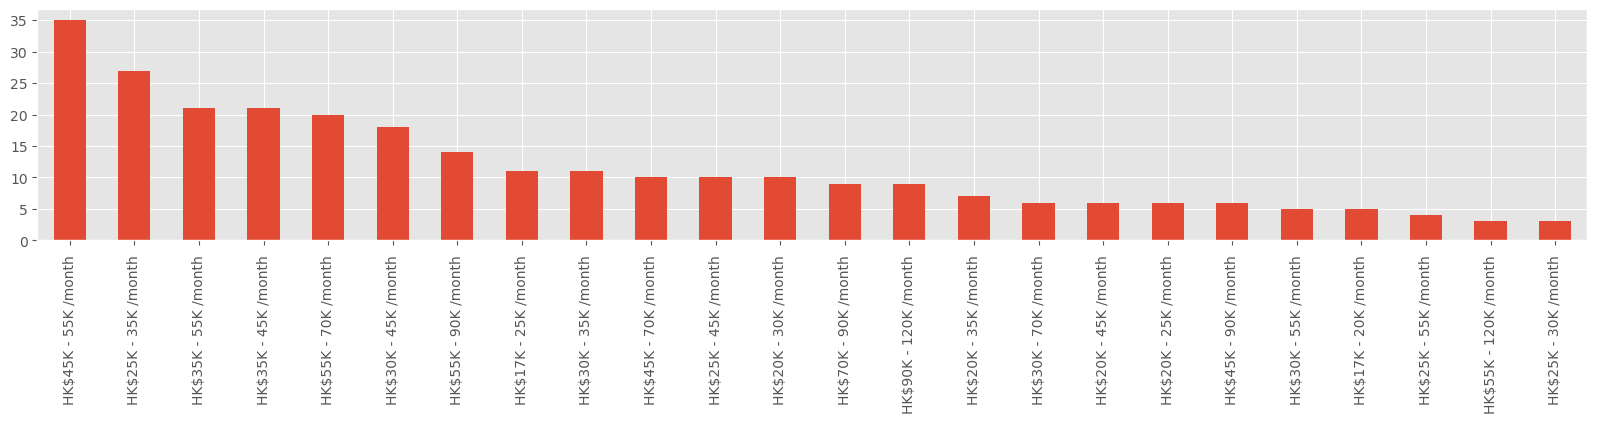

In [24]:
df['Salary'].value_counts()[1:25].plot.bar(figsize=(20,3))


<Axes: >

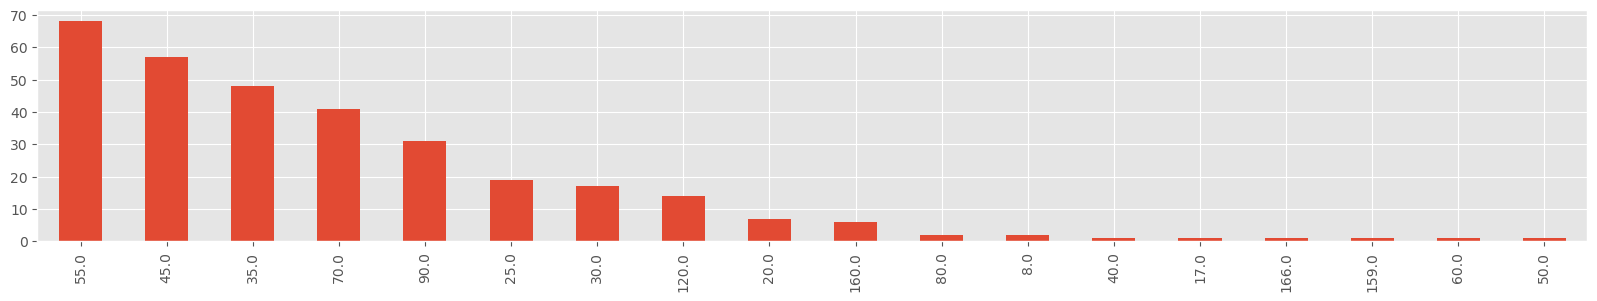

In [25]:
df['Upper Salary Range'].value_counts().plot.bar(figsize=(20,3))


<Axes: >

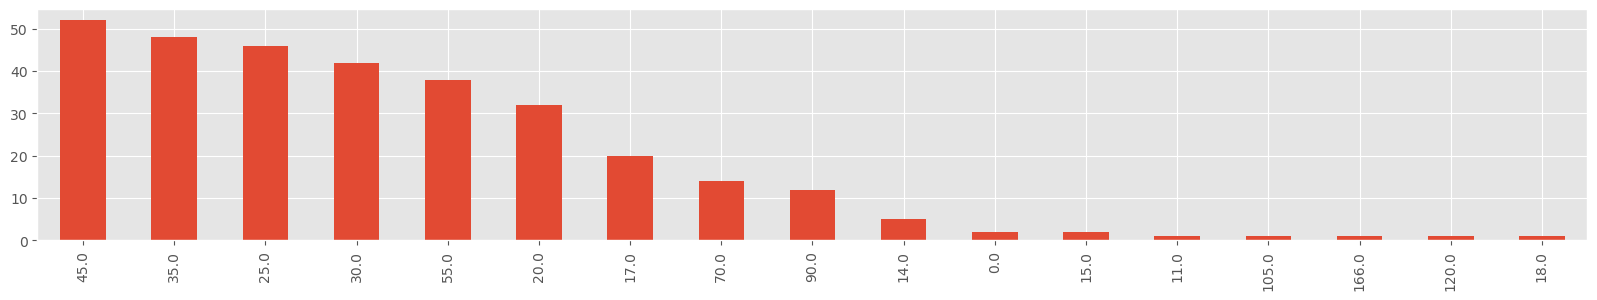

In [26]:
df['Lower Salary Range'].value_counts().plot.bar(figsize=(20,3))
